# K-means Clustering

In this notebook, we will implement the K-means algorithm and use it for image compression. The notebook is structured as follows:

**Outline:**

1. Introduction
   - Briefly introduce the purpose of the notebook.
   
2. Libraries
   - Import necessary libraries for the project.

3. Implementing K-means
   - 1.1 Finding Closest Centroids
      - Describe the first step of the K-means algorithm.
      - Explain Exercise 1: Find Closest Centroids.
   
   - 1.2 Computing Centroid Means
      - Describe the second step of the K-means algorithm.
      - Explain Exercise 2: Compute Centroids.

4. K-means on a sample dataset
   - Generate synthetic data
      - Explain how to generate random cluster data, circular clusters, and vertical clusters.
   
   - Implement K-means on the sample dataset
      - Discuss running the K-means algorithm on the generated dataset.
   
5. Random Initialization
   - Discuss the concept of random initialization and its impact on K-means performance.

6. Image Compression with K-means
   - Load and visualize the original image.

7. Dataset
   - Describe preprocessing steps for the image data.

8. K-Means on Image Pixels
   - Explain running the K-means algorithm on image pixels.
   
9. Compress the Image
   - Describe how to represent the image using computed centroids.
   - Display the original and compressed images.

10. Conclusion
    - Summarize the notebook's key points and findings.

Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

def plot_data_points(X, idx):
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], c=idx)

def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)

    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)

    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])

    plt.title("Iteration number %d" %i)

## 1 - Implementing K-means

### 1.1 Finding Closest Centroids

In this section, we will implement the first step of the K-means algorithm, which is finding the closest centroids for each data point.

#### Exercise 1: Find Closest Centroids

We begin by completing the code for the `find_closest_centroids` function. This function computes the centroid memberships for every example in the dataset.


In [3]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        idx[i] = np.argmin(distances)

    return idx

### 1.2 Computing Centroid Means

In this part, we will implement the second step of the K-means algorithm, which is computing the new centroids based on the assigned data points.

#### Exercise 2: Compute Centroids
The compute_centroids function computes the new centroids by calculating the mean of the data points assigned to each centroid.

In [4]:
# GRADED FUNCTION: compute_centroids
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)

    return centroids

## 2 - K-means on a sample dataset

In this section, we will run the K-means algorithm on a sample dataset to gain a better understanding of how the algorithm works.

### Generate synthetic data
Code bellow generates a synthetic 2D dataset using NumPy. You can run any of these code examples to generate the respective datasets and then use your provided code to apply the K-Means clustering algorithm.

#### Random Clusters

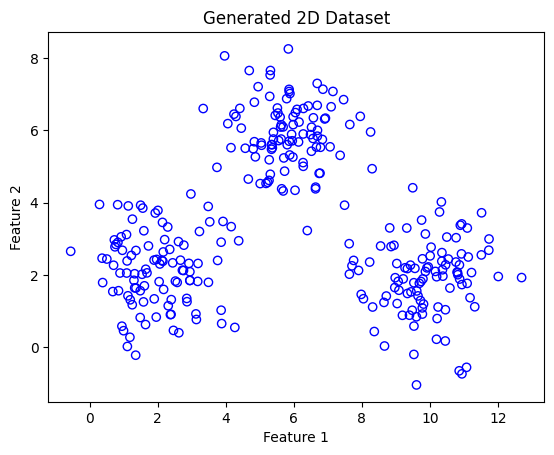

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random cluster data
np.random.seed(0)
cluster1 = np.random.randn(100, 2) + [2, 2]
cluster2 = np.random.randn(100, 2) + [6, 6]
cluster3 = np.random.randn(100, 2) + [10, 2]
X = np.vstack((cluster1, cluster2, cluster3))

# Save the dataset
np.save("ex7_X.npy", X)

# Plot the generated data
plt.scatter(X[:, 0], X[:, 1], marker='o', facecolors='none', edgecolors='b')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated 2D Dataset")
plt.show()


#### Circular clusters

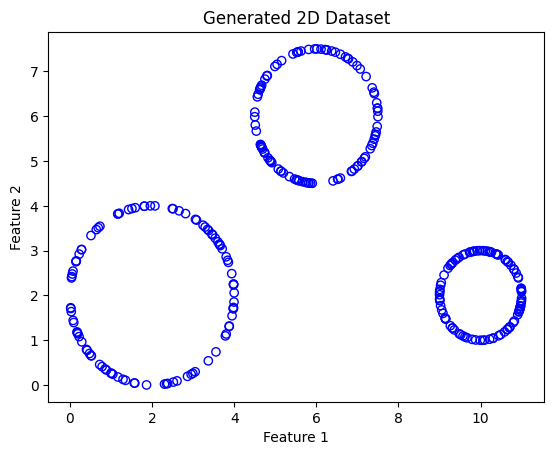

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Generate circular cluster data
np.random.seed(0)
theta1 = np.random.rand(100) * 2 * np.pi
theta2 = np.random.rand(100) * 2 * np.pi
theta3 = np.random.rand(100) * 2 * np.pi

cluster1 = np.column_stack((np.cos(theta1), np.sin(theta1))) * 2 + [2, 2]
cluster2 = np.column_stack((np.cos(theta2), np.sin(theta2))) * 1.5 + [6, 6]
cluster3 = np.column_stack((np.cos(theta3), np.sin(theta3))) * 1 + [10, 2]

X = np.vstack((cluster1, cluster2, cluster3))

# Save the dataset
np.save("ex7_X.npy", X)

# Plot the generated data
plt.scatter(X[:, 0], X[:, 1], marker='o', facecolors='none', edgecolors='b')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated 2D Dataset")
plt.show()


### Vertical Clusters

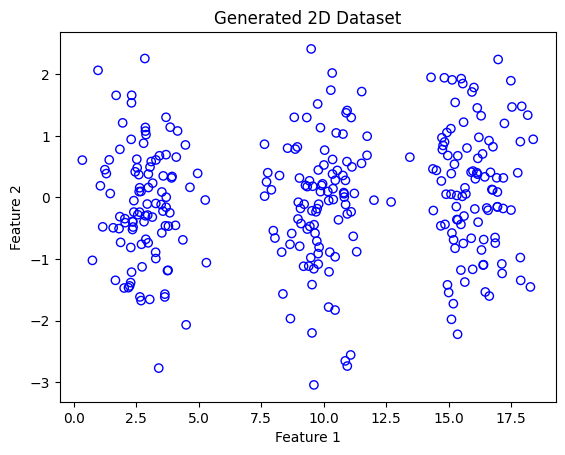

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Generate vertical cluster data
np.random.seed(0)
cluster1 = np.random.randn(100, 2) + [16, 0]
cluster2 = np.random.randn(100, 2) + [3, 0]
cluster3 = np.random.randn(100, 2) + [10, 0]

X = np.vstack((cluster1, cluster2, cluster3))

# Save the dataset
np.save("ex7_X.npy", X)

# Plot the generated data
plt.scatter(X[:, 0], X[:, 1], marker='o', facecolors='none', edgecolors='b')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated 2D Dataset")
plt.show()


K-Means iteration 0/9


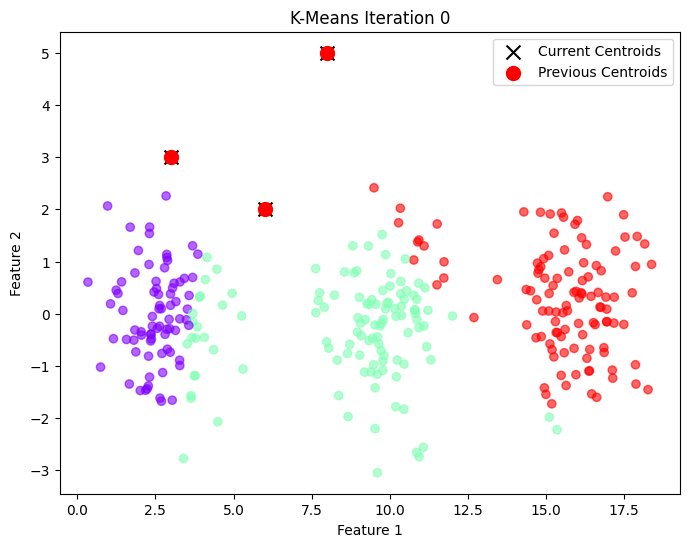

K-Means iteration 1/9


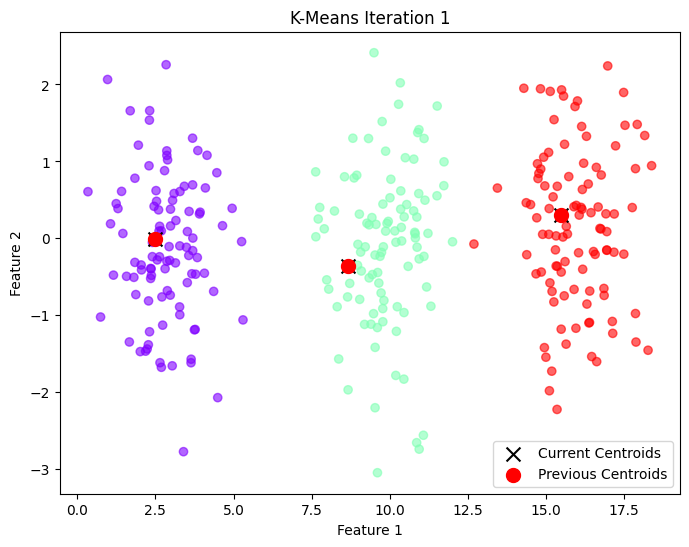

K-Means iteration 2/9


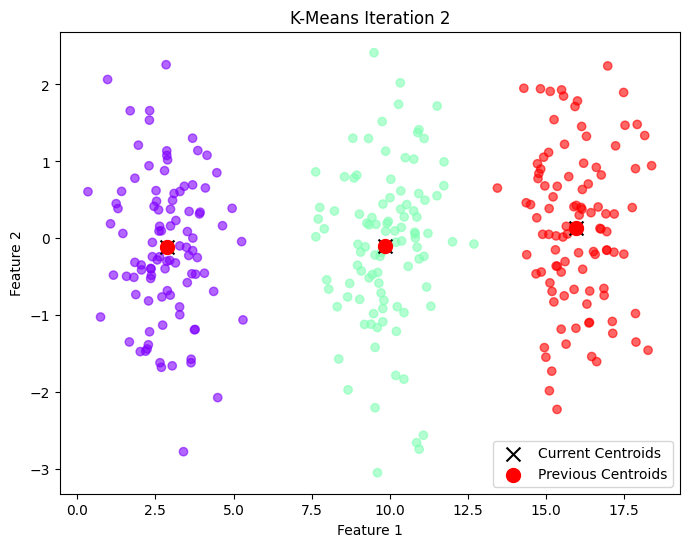

K-Means iteration 3/9


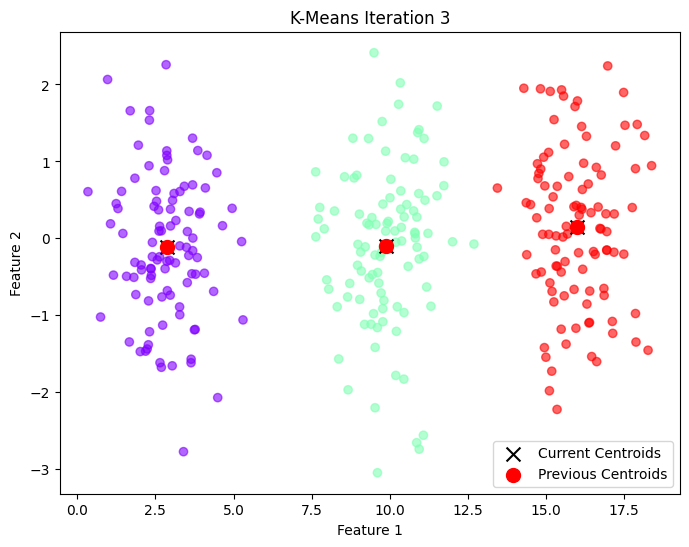

K-Means iteration 4/9


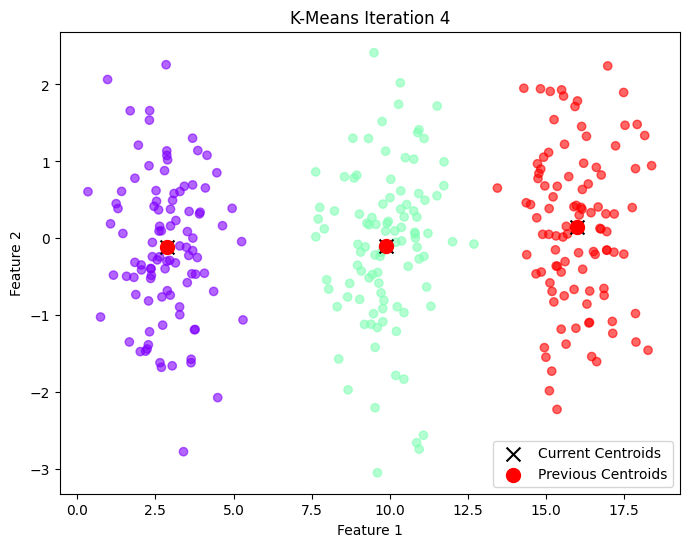

K-Means iteration 5/9


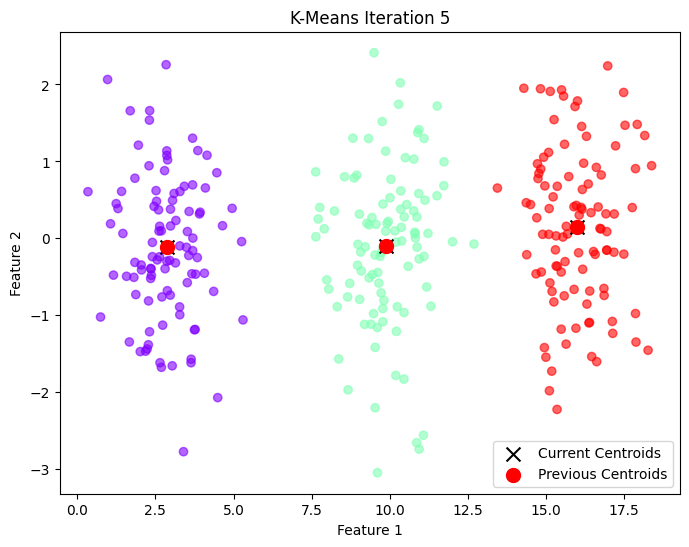

K-Means iteration 6/9


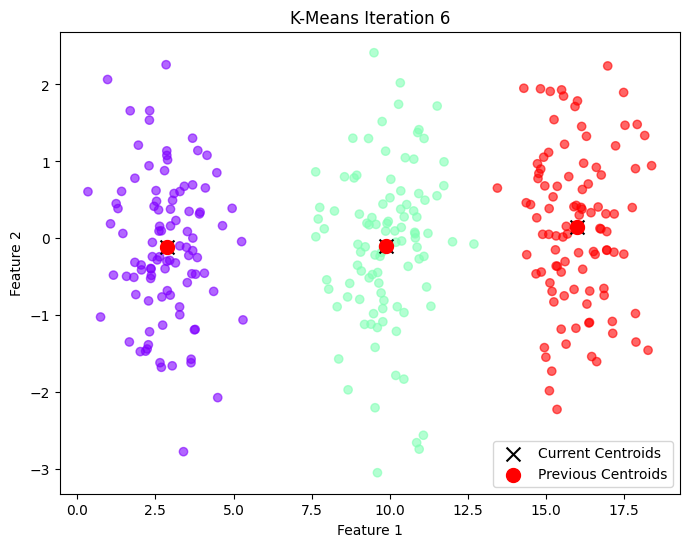

K-Means iteration 7/9


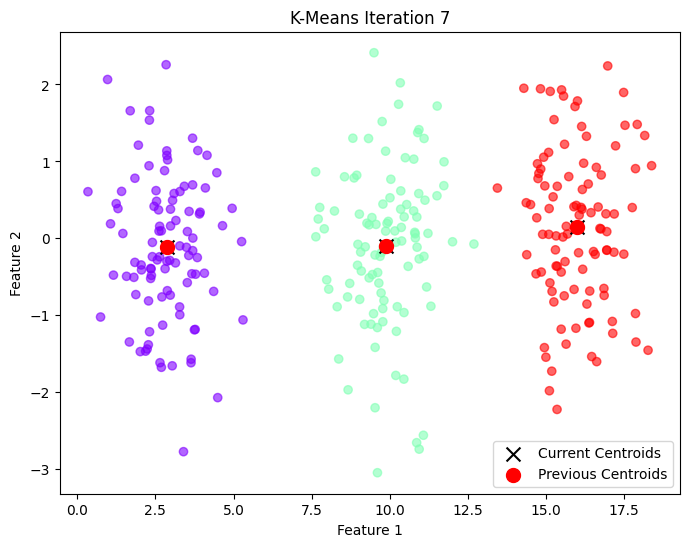

K-Means iteration 8/9


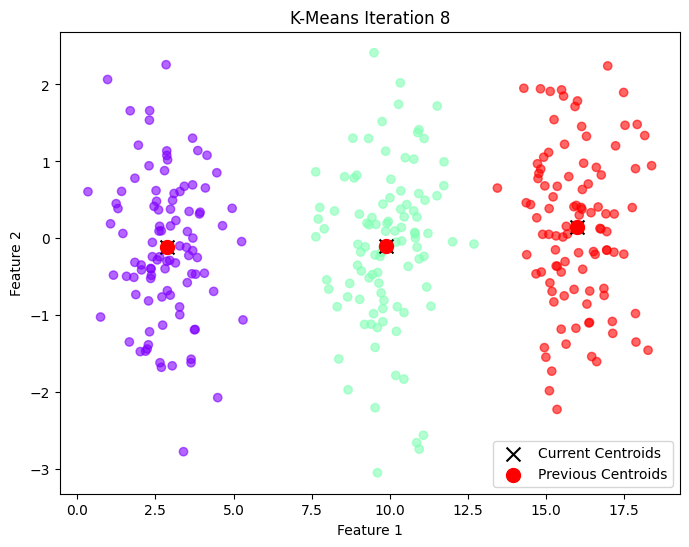

K-Means iteration 9/9


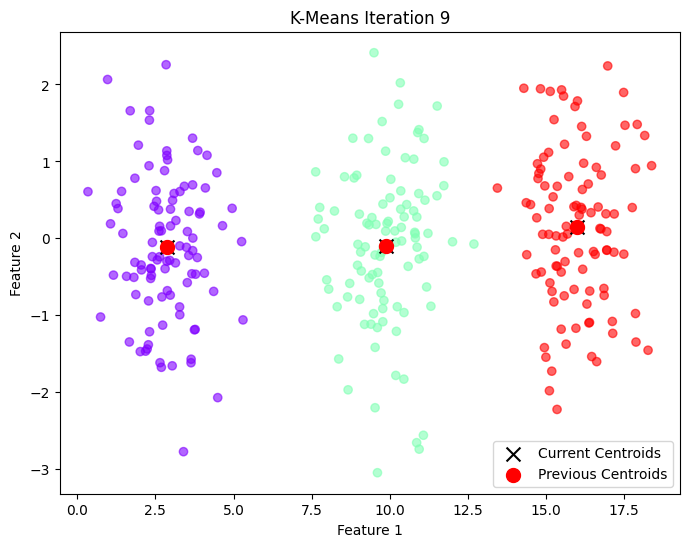

In [77]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define your functions for find_closest_centroids, compute_centroids, and plot_progress_kMeans here
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, iteration):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='rainbow', marker='o', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Current Centroids')
    plt.scatter(previous_centroids[:, 0], previous_centroids[:, 1], c='red', marker='o', s=100, label='Previous Centroids')
    plt.title(f'K-Means Iteration {iteration}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Define run_kMeans with corrected plot_progress_kMeans call
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(m)

    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        idx = find_closest_centroids(X, centroids)

        if plot_progress:
            plot_progress_kMeans(X, centroids, centroids, idx, K, i)  # Corrected this line

        centroids = compute_centroids(X, idx, K)

# Load an example dataset
X = np.load("ex7_X.npy")

# Set initial centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
K = 3

# Number of iterations
max_iters = 10

# Run K-Means with plotting at each iteration
run_kMeans(X, initial_centroids, max_iters, plot_progress=True)



## 3 - Random Initialization

Here, we will discuss the concept of random initialization and how it affects the performance of the K-means algorithm.

In [12]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

# 4 - Image Compression with K-means
In this section, we will apply the K-means algorithm to compress an image by reducing the number of colors present.

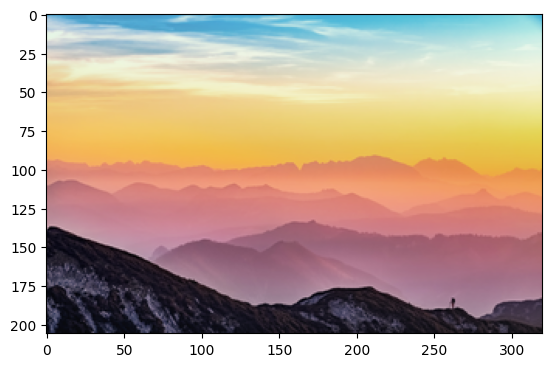

In [56]:
# Load image
original_img = plt.imread('landscape-png.png')
# Visualizing the image
plt.imshow(original_img)

#### 4.1 Dataset
We will load an example image and preprocess it for the K-means algorithm.

#### 4.2 K-Means on Image Pixels
We will run the K-means algorithm on the image pixels to find the most representative colors.

In [57]:
# Preprocess image data
original_img = original_img / 255
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

# Run K-Means
K = 4
max_iters = 10
initial_centroids = kMeans_init_centroids(X_img, K)
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)



K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


#### 4.3 Compress the Image
We will represent the image using the computed centroids and display the original and compressed images.



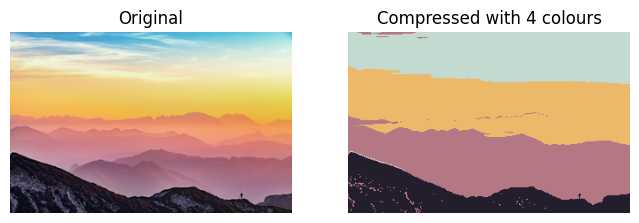

In [58]:
# Represent image in terms of indices
X_recovered = centroids[idx, :]

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

# Display original and compressed images
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].imshow(original_img * 255)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered * 255)
ax[1].set_title('Compressed with %d colours' % K)
ax[1].set_axis_off()

plt.show()


Feel free to modify the notebook and add more explanatory text or visualizations to enhance your understanding of the concepts presented.

Adapted from:


*   https://www.analyticsvidhya.com/blog/2021/07/colour-quantization-using-k-means-clustering-and-opencv/
*   https://github.com/jxareas/Machine-Learning-Notebooks/tree/master
*   https://www.coursera.org/specializations/machine-learning-introduction?action=enroll

